<a href="https://colab.research.google.com/github/ColdDarkCoffee/Timeseries_stock_data_and_splitting/blob/main/Machine_learning_modeling(timeseries_machine_learning_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting stocks using timeseries**

#This time will will just get the data then use it for our machine's models

In [1]:
# important general libraries
import time
import datetime
import pandas as pd
import numpy as np
import os
# import for machine learning
import tensorflow as tf

# Ask user for amount

In [2]:
# Asking user what companies you want to record
tickers = input("Example: AAPl TSLA AMZN GOOG MSFT FB \n\
What companies do you want to forecast? list below in market cap name:  ")
tickers = tickers.split()

Example: AAPl TSLA AMZN GOOG MSFT FB 
What companies do you want to forecast? list below in market cap name:  AAPl TSLA AMZN GOOG MSFT FB 


#Process user input

In [3]:
2# Getting the date of forecasting
from datetime import datetime as date_data 
from datetime import timedelta
# getting yesterday's, years, months and day from x years ago       
years_of_stock =  input("Recommended 5 to 10 years \n\
How many years of stocks do you want to forecast? Numbers only:  ")
yesterday = datetime.datetime.strftime(datetime.datetime.now() - timedelta(1), '%Y-%m-%d')
yesterday_year = int(yesterday[0:4])
yesterday_month = int(yesterday[5:7])
yesterday_day = int(yesterday[8:11])
years_of_stock = int(years_of_stock)*-1 
interval = '1d' # We are collecting data by day
# date given to query string
period1 = int(time.mktime(datetime.datetime(yesterday_year+years_of_stock, yesterday_month, yesterday_day, 23, 59).timetuple())) # starting period 
period2 = int(time.mktime(datetime.datetime(yesterday_year, yesterday_month, yesterday_day, 23, 59).timetuple())) # starting by yesterday's date
# date for graph labels
period1_date = str(yesterday_year+years_of_stock) + "-" +  str(yesterday_month) + "-" +str(yesterday_day)
period2_date = str(yesterday_year) + "-" +  str(yesterday_month) + "-" +str(yesterday_day)

Recommended 5 to 10 years 
How many years of stocks do you want to forecast? Numbers only:  5


In [4]:
# Assigning price values before usage 
list = tickers
price = list
price = [item + '_price' for item in list]

In [5]:
# Collecting all the data accordingly
import pandas as pd
# change every xlsx file into csv files
for i in range(0,len(tickers)):
  xlwriter = pd.ExcelWriter(f'historical prices_{tickers[i]}.xlsx', engine='openpyxl')
  query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{tickers[i]}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
  df = pd.read_csv(query_string)
  df.to_excel(xlwriter, sheet_name=tickers[i], index=False)
  xlwriter.save()
  # change into xlsx file
  read_file = pd.read_excel(f"/content/historical prices_{tickers[i]}.xlsx")  
  # change into csv file
  read_file.to_csv (f"historical prices_{tickers[i]}.csv", 
                    index = None,
                    header=True)
  # Removing all other data besides the closing price and the amount of days
  #globals()[X_train[i]], globals()[X_test[i]] =  timesteps[:split_size], timesteps[split_size:]

  #globals()[amount[i]] = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Price"]).to_numpy()
  globals()[price[i]] = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"])
  globals()[price[i]] = globals()[price[i]].to_numpy()
  globals()[tickers[i]] = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})

#Display chosen companies along with chosen year(s)

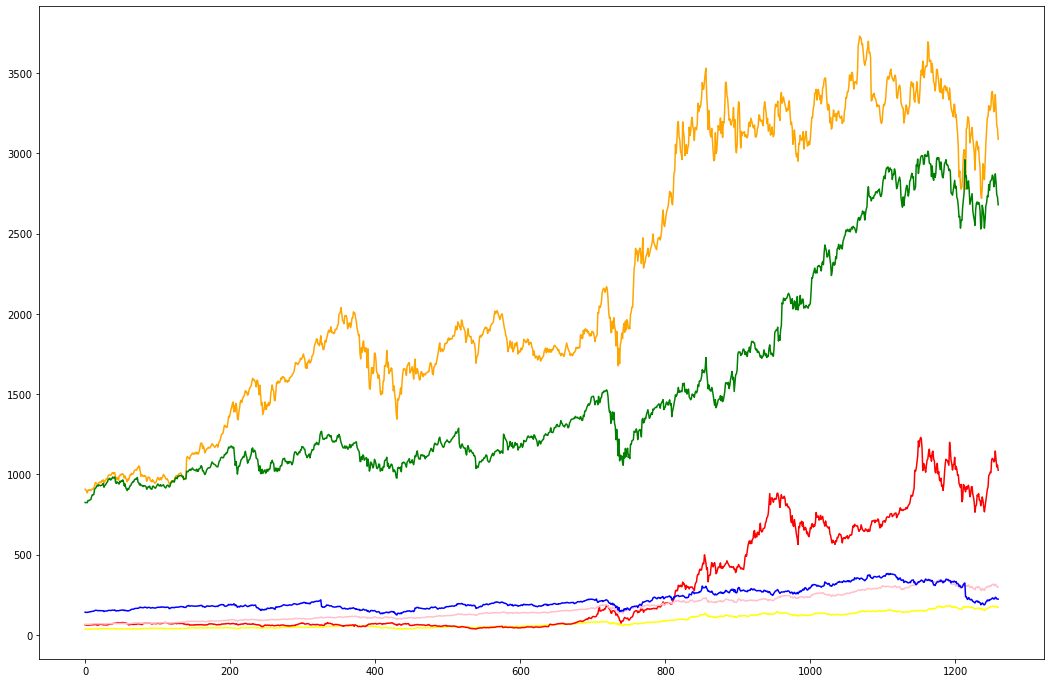

In [6]:
import matplotlib
import random 
from matplotlib import pyplot as plt
# plot the stock graphs
# figurations of our graph 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 12)
fig.savefig('test2png.png', dpi=100)
# random colors for looks
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'gray', 'black']
for i in range(0,len(tickers)):
  random_color = random.choice(colors)
  # This is optional, example this action certain companies
  # ⬇⬇⬇ appear as the color of their logo for example
  if tickers[i] == 'TSLA':
    random_color = 'red'
  if tickers[i] == 'FB':
    random_color = 'blue'
  if tickers[i] == 'GOOG':
    random_color = 'green'
  if tickers[i] == 'AAPL':
    random_color = 'gray'
  if tickers[i] == 'AMZN':
    random_color = 'orange'
  # ⬆⬆⬆ companies out of the block would be assigned a random color
  plt.plot(pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"}), color=random_color)

#Display Chosen Train and Test split amongst datasets




In [7]:
# since again all of the data starts and ends in the same date they would have the same timesteps
# so one is good enough and turing the prices to numpy
# Then again ask the amount of data you want in the test and train section
timesteps = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"].index.to_numpy()
for i in range(0,len(tickers)):
  globals()[tickers[i]] = pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"]
  globals()[tickers[i]]  = globals()[tickers[i]].to_numpy()

In [8]:
# Make a new name based on tickers to name variables into user
# entered name for example "GOOG" would be it's own varible
tickers_name = []
# for the whatever amount of tickers aka asked companies
# make a variable equal to tickers
for i in range(0,len(tickers)):
  tickers_name.append(tickers[i])
  
  tickers_name[i] = tickers[i]
# Making a X_train, y_train, X_test and y_test for every company 
# for example: GOOG would have it's own split data being named
# as GOOG_X_train, GOOG_y_train, GOOG_X_test and GOOG_y_test
# Along with every single company(ies) entered
list = tickers_name
X_train = list
X_test = list
y_train = list
y_test = list
# Making X_train, y_train, X_test and y_test variables 
# for every company in list 
X_train = [item + '_X_train' for item in list]
X_test = [item + '_X_test' for item in list]
y_train = [item + '_y_train' for item in list]
y_test = [item + '_y_test' for item in list]

# Splitting the data property for timeseries

Recommended 50 to 80 percent of data 
What full number or percent do you want to predict with?: 60


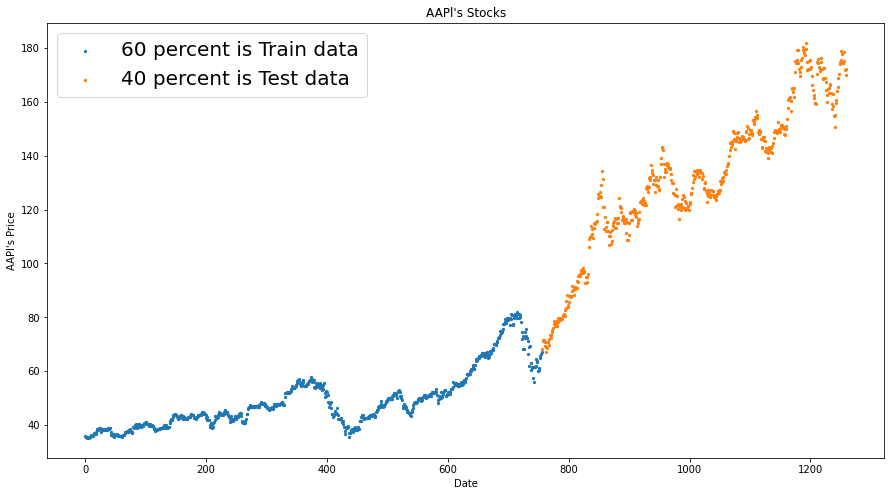

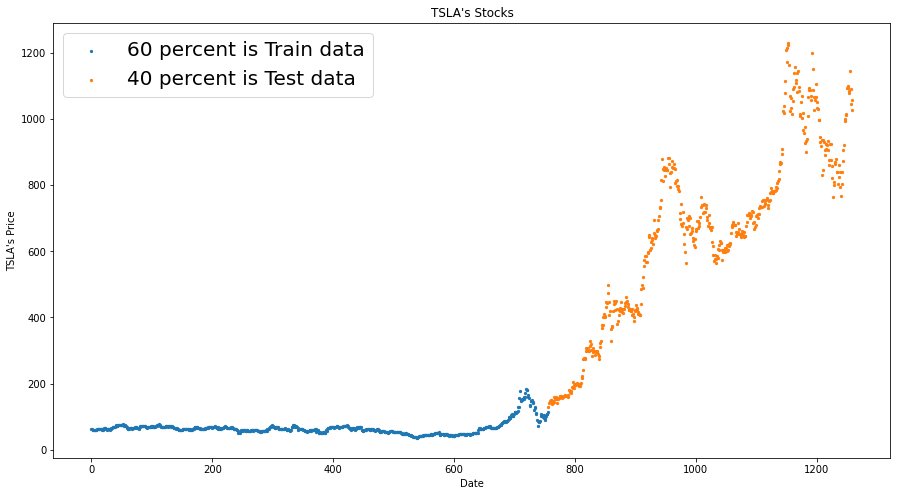

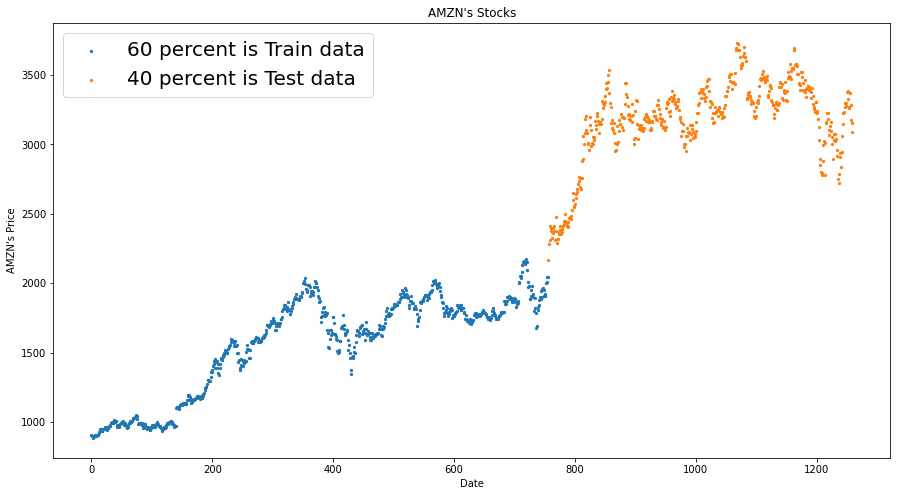

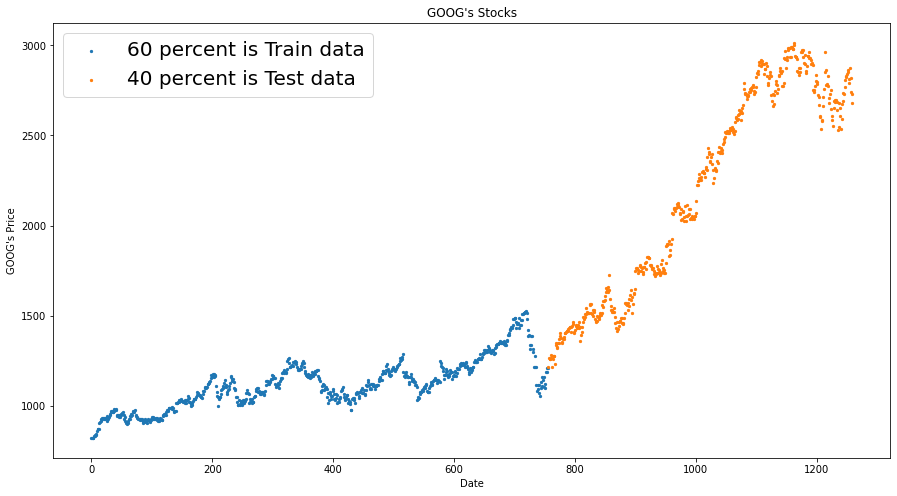

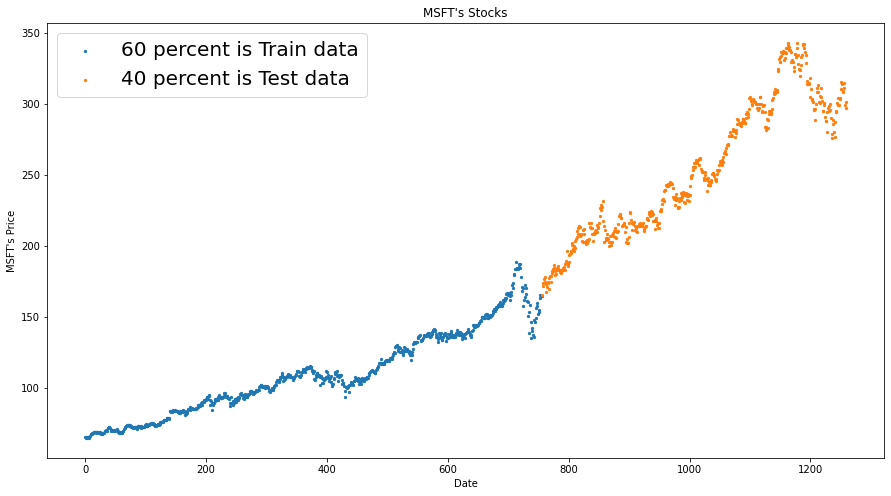

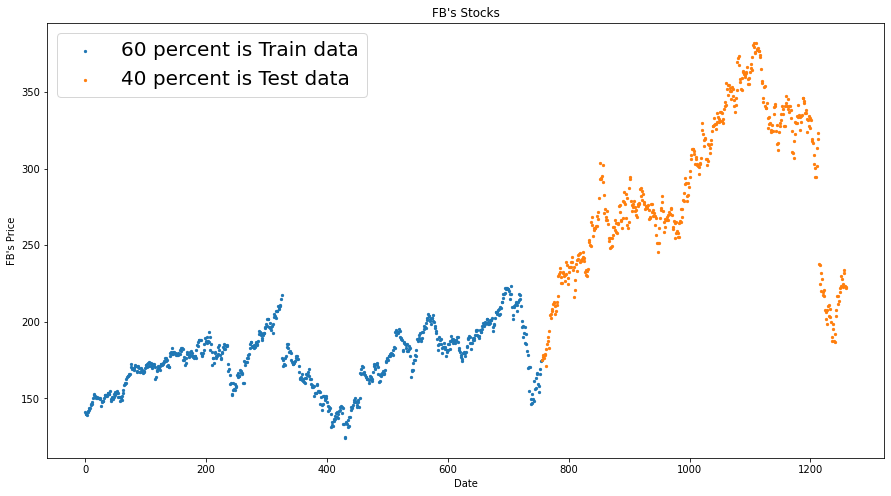

In [9]:
amount = float(input("Recommended 50 to 80 percent of data \n\
What full number or percent do you want to predict with?: "))
# if user entered number lower than 1 then it's a decimal float (example: .70)
# that's is already prepared if it's a number over 1 like 50 then it's going
# it be divide by 100 so it would be prepared for the split train amount
# if the user's number is less than 0, then it's a negative number which
# will turn postive by multiplying the number with negative one. 
##  ⬇⬇⬇
if amount < 0:
  amount = amount  * -1 
if amount < 1:
  amount = amount * 100
if amount > 1:
  amount = amount / 100 
#   ⬆⬆⬆
for i in range(0,len(tickers)):
  try:
    # spliting all of ticker data by user amount given ⬇⬇⬇
    split_size = int(amount * len(pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"]))
    # Assignment the varibles made earlier into the Dataframes' Train, test splits ⬇⬇⬇
    globals()[X_train[i]], globals()[X_test[i]] =  timesteps[:split_size], timesteps[split_size:]
    globals()[y_train[i]] =  (pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"])[split_size:]
    globals()[y_test[i]] =  (pd.DataFrame(pd.read_csv(f"historical prices_{tickers[i]}.csv")["Close"]).rename(columns={"Close": "Price"})["Price"])[:split_size]
    # matplotlib graph properties ⬇⬇⬇
    plt.figure(figsize=(15, 8))              # display percentage of train and test data
    plt.scatter(globals()[X_train[i]], globals()[y_test[i]], s=5, label=f"{int(amount * 100)} percent is Train data")
    plt.scatter(globals()[X_test[i]], globals()[y_train[i]], s=5, label=f"{100-(int(amount * 100))} percent is Test data")
    plt.xlabel("Date")
    plt.ylabel(f"{tickers[i]}'s Price") # Change ylabel name into given companies name's Price
    plt.title(f"{tickers[i]}'s Stocks") # Change ylabel name into given companies name's Stocks 
    plt.legend(fontsize=20)
    sucess = True # check if graphing is sucessful 
  except:
    if sucess == False:
      print("There is an error in the train test distrution due to inconsistent days")
      print("After various tests, companies for example: 2222.SR have errors on dataset")
      print("You can either replace selected company or remove it all together")
    # matplotlib graph properties ⬆⬆⬆
plt.show()
# note: if block crashes, one of the companies have inconsistent days of stock data
# for example the csv can't collect all of those chosen days 

In [10]:
# importing helper functions for our model 
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


# Setting up functions for modeling

In [11]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [12]:
def get_labelled_windows(x, horizon=1):
  return x[:, :-horizon], x[:, -horizon:]

In [13]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [14]:
def make_windows(x, window_size=7, horizon=1):
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")
  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [51]:
split_amount =  100-(int(amount * 100))
split_amount = split_amount/100

In [53]:
def make_train_test_splits(windows, labels, test_split=split_amount):
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [54]:
import numpy as np

In [55]:
# Make a new name based on tickers to name variables into user
windows_name = []

for i in range(0,len(tickers)):
  windows_name.append(tickers[i])
  
  windows_name[i] = tickers[i]

In [56]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [58]:
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [153]:
def Simple_Dense_Model(amount):
  # Creating test_windows and test_labels for our dataset
  test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
  # Print if test window and test label is correctly formated
  print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")
  full_windows, full_labels = make_windows(amount, window_size=WINDOW_SIZE, horizon=HORIZON)
  # print full windows and full labels
  len(full_windows), len(full_labels)
  train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
  len(train_windows), len(test_windows), len(train_labels), len(test_labels)
  np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])


  # Set random seed for as reproducible results as possible
  tf.random.set_seed(42)

  # Construct model
  model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
  ], name="model_1_dense") # give the model a name so we can save it

  # Compile model
  model_1.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

  # Fit model
  model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
              y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
              epochs=100,
              verbose=1,
              batch_size=128,
              validation_data=(test_windows, test_labels)) 

  model_1.evaluate(test_windows, test_labels)
  model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
  model_1.evaluate(test_windows, test_labels)
  model_1.save(name)
  globals()[names[i]] = make_preds(globals()[tickers[i]],
                          input_data=test_windows)
  return test_windows

In [150]:
name = tickers
tickers
names = tickers
tickers

['AAPl', 'TSLA', 'AMZN', 'GOOG', 'MSFT', 'FB']

In [154]:
for i in range(0, len(tickers)):
  name = f"model_{tickers[i]}" # name of the models based on the comapany's name
  Simple_Dense_Model(globals()[price[i]])

  globals()[tickers[i]] = tf.keras.models.load_model(f'/content/model_{tickers[i]}')


Window: [1 2 3 4 5 6 7] -> Label: 8
Epoch 1/100
6/6 [==============================] - 1s 51ms/step - loss: 37.0594 - mae: 37.0594 - val_loss: 92.1824 - val_mae: 92.1824
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 32.8709 - mae: 32.8709 - val_loss: 81.1042 - val_mae: 81.1042
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 28.6466 - mae: 28.6466 - val_loss: 69.8438 - val_mae: 69.8438
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 24.3290 - mae: 24.3290 - val_loss: 58.3707 - val_mae: 58.3707
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 19.9370 - mae: 19.9370 - val_loss: 46.5461 - val_mae: 46.5461
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 15.3731 - mae: 15.3731 - val_loss: 34.2925 - val_mae: 34.2925
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 10.6327 - mae: 10.6327 - val_loss: 21.5352 - val_mae: 21.5352
Epoch 8/100
6/6 [=============

In [139]:
# example of finish product 
new_model = tf.keras.models.load_model('/content/model_AAPl')
new_model = make_preds(new_model,
                           input_data=test_windows)

NameError: ignored

In [ ]:
  model_1.evaluate(test_windows, test_labels)
  model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
  model_1.evaluate(test_windows, test_labels)
  # Get forecast predictions
  model_1_preds = make_preds(model_1,
                           input_data=test_windows)
  model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_1_preds)
  

In [ ]:
  model_1.evaluate(test_windows, test_labels)
  # Get forecast predictions
  model_1_preds = make_preds(model_1,
                           input_data=test_windows)
  model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_1_preds)